In [205]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from typing import Tuple, Optional, Union
from pathlib import Path
%matplotlib inline

In [118]:
img = cv2.imread('letter_00000.jpg')
img = cv2.resize(img, (512, 512))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

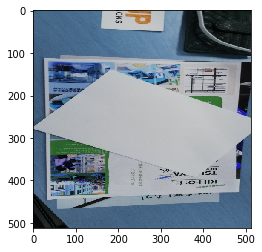

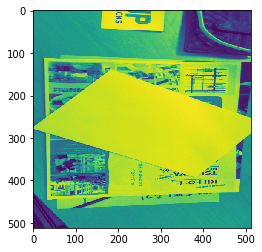

In [119]:
# test show all images.

plt.imshow(img)
plt.show()

plt.imshow(gray)
plt.show()

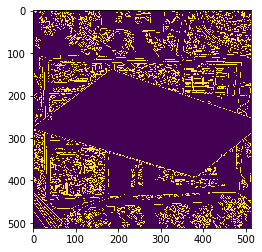

In [101]:
edges = cv2.Canny(gray, 0, 50, apertureSize = 3)

plt.imshow(edges)
plt.show()

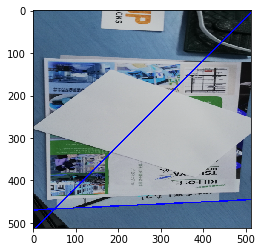

In [93]:
mg = img
lines = cv2.HoughLines(edges, 1, np.pi/200, 100)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    
    cv2.line(img, (x1,y1),(x2,y2),(0,0,255),2)
    
plt.imshow(img)
plt.show()

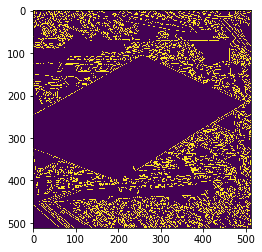

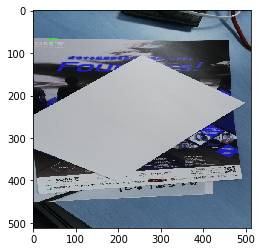

In [8]:
img = cv2.imread('letter_00002.jpg')
img = cv2.resize(img, (512, 512))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 0, 50, apertureSize = 3)

plt.imshow(edges)
plt.show()

minLineLength = 10
maxLineGap = 10
lines = cv2.HoughLinesP(edges, 1, np.pi/180,100, minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
    
plt.imshow(img)
plt.show()

In [185]:
import cv2
import numpy as np

src = cv2.imread('letter_00000.jpg', 0)
src = cv2.resize(src, (256, 256))
dst = src.copy()

def threshold(x):
    global dst
    ret, dst = cv2.threshold(src, x, 255, cv2.THRESH_BINARY)

cv2.namedWindow('Image')
cv2.createTrackbar('Threshold', 'Image', 0, 255, threshold)

while(True):
    cv2.imshow('Image', dst)

    key = cv2.waitKey(1)
    if key == 27:
        break

    # get current threshold.
    thresh = cv2.getTrackbarPos('Threshold', 'Image')

cv2.destroyAllWindows()

KeyboardInterrupt: 

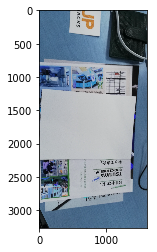

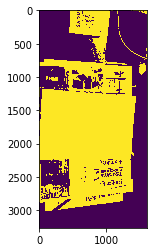

In [17]:
# test_otsu
img = cv2.imread('letter_00001.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#gray = cv2.GaussianBlur(img, img, (5, 5), 8)
ret, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)    

plt.imshow(img)
plt.show()

plt.imshow(th2)
plt.show()

In [206]:
# test for zoming to center.
SIZE_EXTRACT = (400, 400)
SIZE_RESIZE = (512, 512)

def extract_center_position(
    img_array: 'np.ndarray',
    size_extract: Tuple[int, int]=SIZE_EXTRACT,
    center_position: tuple=None,
    gray_scale: bool=True,
    ) -> 'np.ndarray':
    '''
    get the center position 
    
    :param img_array: img converted to numpy array.
    :param shape_extract: size of width and height for extractiong image.
    :param center_position: position to get some pixels around specified center.
    :param gray_scale: image is gray scale or not.
    :return numpy array of center.
    '''
    half_exp_width = size_extract[0] // 2
    half_exp_height = size_extract[1] // 2
    
    img_width, img_height = img_array.shape[:2]
    if center_position is None:
        x_center = img_width // 2
        y_center = img_height // 2
    else:
        x_center, y_center = size_extract
        
    center_left = x_center - half_exp_width if x_center - half_exp_width > 0 else 0
    center_right = x_center + half_exp_width if x_center + half_exp_width < img_width else img_width
    center_bottom = y_center - half_exp_height if y_center + half_exp_height > 0 else 0
    center_top = y_center + half_exp_height if y_center + half_exp_height < img_height else img_height

    if gray_scale:
        extracted = img_array[center_left: center_right, center_bottom: center_top]
    else:
        extracted = img_array[center_left: center_right, center_bottom: center_top, :]

    return extracted

In [234]:
def predict_mail_type(
    img_path: Union[str, Path],
    resize: Optional[Tuple[int, int]]=None,
    threshold_stddev: int=100,
    size_extract: Tuple[int, int]=SIZE_EXTRACT,
    center_position: tuple=None,
    gray_scale: bool=True,
) -> str:
    '''
    predict type of mail.
    
    :param img_path: img path to predict.
    :threshold_stddev: threshold for standard deviation to decide the mail is important.
    :param shape_extract: size of width and height for extractiong image.
    :param center_position: position to get some pixels around specified center.
    :param gray_scale: image is gray scale or not.
    :return numpy array of center.
    '''
    IMPORTANT_MAIL = 'important'
    NOT_IMPORTANT_MAIL = 'not_important'
    
    if isinstance(img_path, str):
        img_path = Path(img_path)
    assert img_path.exists()
    
    img_arr = cv2.imread(str(img_path))
    
    if resize is not None:
        img_rr = cv2.resize(img_arr, resize)

    gray_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
    extracted_img = extract_center_position(gray_arr, size_extract, center_position, gray_scale)
    stddev = int(np.std(extracted_img))
    
    if threshold_stddev > stddev:
        return IMPORTANT_MAIL
    else:
        return NOT_IMPORTANT_MAIL

(3264, 1616, 3)


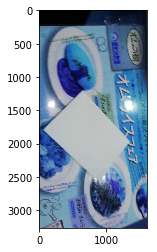

(512, 512, 3)


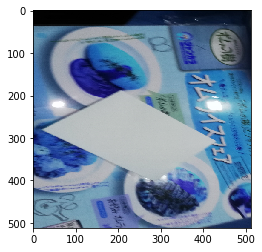

(300, 300, 3)


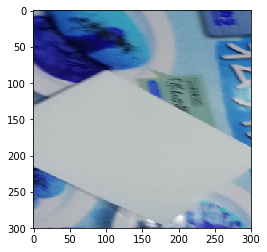

In [239]:
img = cv2.imread('letter_00004.jpg')

print(img.shape)
plt.imshow(img)
plt.show()

img = cv2.resize(img, (512, 512))
print(img.shape)
plt.imshow(img)
plt.show()

img = extract_center_position(img, size_extract=(300, 300))
print(img.shape)

plt.imshow(img)
plt.show()



In [226]:
img = cv2.imread('letter_00000.jpg')
img = cv2.resize(img, (512, 512))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = extract_center_position(gray, size_extract=(300, 300))
print(int(np.std(img)))
mean, stddev = cv2.meanStdDev(img)
print(stddev)

36
[[36.82091271]]


In [237]:
predict_mail_type('letter_00003.jpg')

'important'